In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [23]:
df=pd.read_csv('~/Downloads/Cookie_Cats_cleaned_v01.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [24]:
df.loc[df['retention_1']== True, 'retention_1'] = 1
df.loc[df['retention_1']== False, 'retention_1'] = 0
df.loc[df['retention_7']== True, 'retention_7'] = 1
df.loc[df['retention_7']== False, 'retention_7'] = 0

/var/folders/ht/qs8tmmy5007cstwcxtpn4zjr0000gn/T/ipykernel_91201/3458895375.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['retention_1']== True, 'retention_1'] = 1
/var/folders/ht/qs8tmmy5007cstwcxtpn4zjr0000gn/T/ipykernel_91201/3458895375.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['retention_7']== True, 'retention_7'] = 1


In [25]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,0,0
1,337,gate_30,38,1,0
2,377,gate_40,165,1,0
3,483,gate_40,1,0,0
4,488,gate_40,179,1,1


In [26]:
len(df)

90189

In [27]:
#check of pop that has more than 
x= df.query('sum_gamerounds >=40')
x.groupby('version').apply(lambda x: x.describe())

/var/folders/ht/qs8tmmy5007cstwcxtpn4zjr0000gn/T/ipykernel_91201/359411529.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  x.groupby('version').apply(lambda x: x.describe())


userid  sum_gamerounds
version                                    
gate_30 count  1.356600e+04    13566.000000
        mean   4.991969e+06      145.713254
        std    2.877189e+06      452.118758
        min    2.218000e+03       40.000000
        25%    2.531476e+06       57.000000
        50%    4.960123e+06       90.000000
        75%    7.481605e+06      167.000000
        max    9.997757e+06    49854.000000
gate_40 count  1.382700e+04    13827.000000
        mean   5.028033e+06      142.667824
        std    2.878797e+06      151.198353
        min    3.770000e+02       40.000000
        25%    2.529065e+06       58.000000
        50%    5.033763e+06       92.000000
        75%    7.510767e+06      165.000000
        max    9.999768e+06     2640.000000

In [28]:
#participants in experiment
df['version'].value_counts()

version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

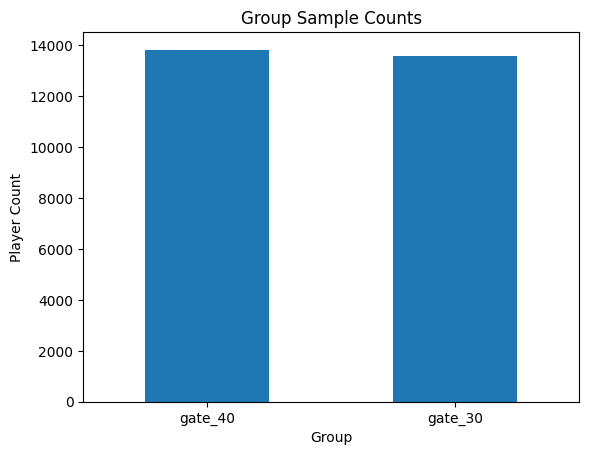

In [29]:
x['version'].value_counts().plot(kind='bar')
plt.title("Group Sample Counts")
plt.xlabel("Group")
plt.ylabel("Player Count")
plt.xticks(rotation=0)
plt.show()

In [30]:
ret_1 = x.groupby("version")["retention_1"].mean()
ret_7 = x.groupby("version")["retention_7"].mean()

print(" Day 1 Retention:\n", ret_1)
print("\n Day 7 Retention:\n", ret_7)

 Day 1 Retention:
 version
gate_30    0.837609
gate_40    0.830187
Name: retention_1, dtype: object

 Day 7 Retention:
 version
gate_30    0.502875
gate_40    0.485065
Name: retention_7, dtype: object


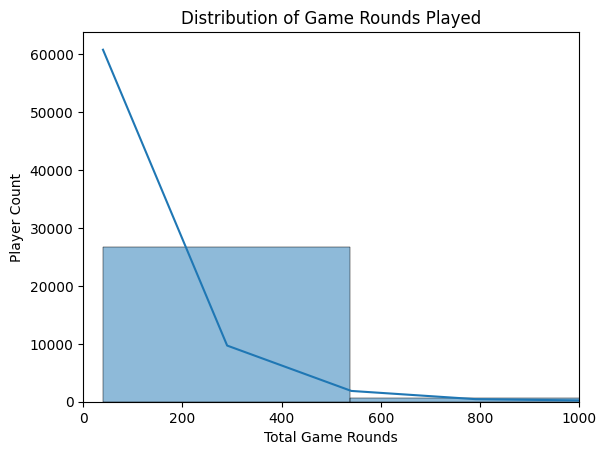

In [31]:

sns.histplot(data=x, x='sum_gamerounds', bins=100, kde=True)
plt.title("Distribution of Game Rounds Played")
plt.xlabel("Total Game Rounds")
plt.ylabel("Player Count")
plt.xlim(0, 1000)  # Limit x-axis to focus on typical range
plt.show()

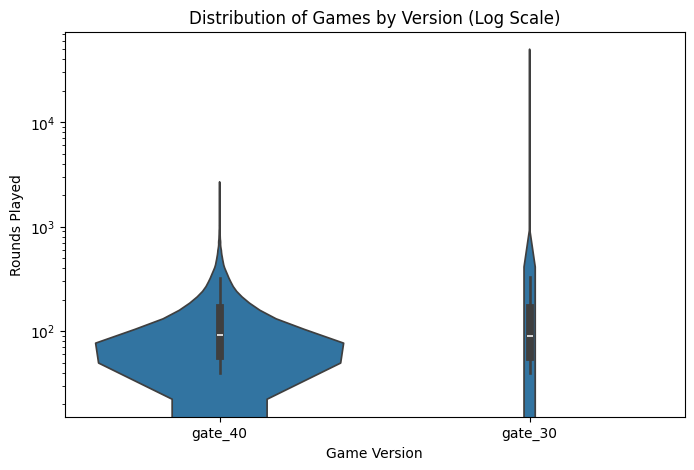

In [32]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=x, x="version", y="sum_gamerounds")
plt.yscale("log")
plt.title("Distribution of Games by Version (Log Scale)")
plt.xlabel("Game Version")
plt.ylabel("Rounds Played")
plt.show()

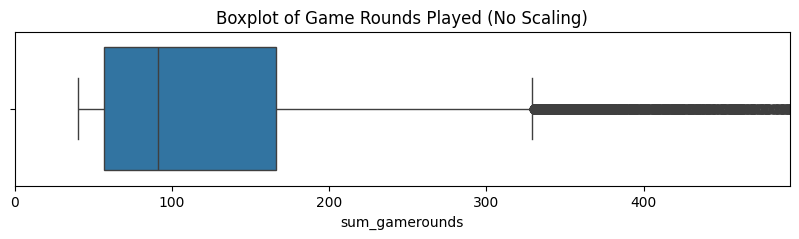

In [33]:
#uncorrected IQR
plt.figure(figsize=(10, 2))  

sns.boxplot(x=x["sum_gamerounds"])
plt.title("Boxplot of Game Rounds Played (No Scaling)")
plt.xlabel("sum_gamerounds")
plt.xlim(0, df["sum_gamerounds"].quantile(0.99))  
plt.show()

/var/folders/ht/qs8tmmy5007cstwcxtpn4zjr0000gn/T/ipykernel_91201/421979701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['logonly']=np.log1p(x['sum_gamerounds'])


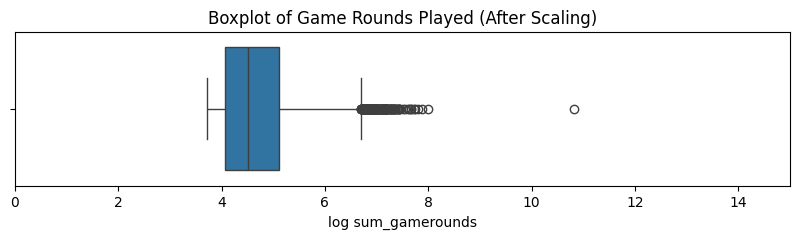

In [34]:
 
x['logonly']=np.log1p(x['sum_gamerounds'])  

plt.figure(figsize=(10, 2))  
sns.boxplot(x=x['logonly'])
plt.title("Boxplot of Game Rounds Played (After Scaling)")
plt.xlabel("log sum_gamerounds")
plt.xlim(0, 15)  
plt.show()

### X^2 Test

In [35]:
from scipy.stats import chi2_contingency

day1_table = pd.crosstab(x['version'], x['retention_1'])
day7_table = pd.crosstab(x['version'], x['retention_7'])
# Perform chi-squared test
chi2_day1, p1, _, _ = chi2_contingency(day1_table)
chi2_day7, p7, _, _ = chi2_contingency(day7_table)

In [36]:

print("Chi-Squared Test Results")
print("-------------------------")
print(f"Day 1 retention: p-value = {p1:.5f}")
print(f"Day 7 retention: p-value = {p7:.5f}")

Chi-Squared Test Results
-------------------------
Day 1 retention: p-value = 0.10231
Day 7 retention: p-value = 0.00333


In [37]:
day1_table

retention_1,0,1
version,,
gate_30,2203,11363
gate_40,2348,11479


In [38]:
day7_table

retention_7,0,1
version,,
gate_30,6744,6822
gate_40,7120,6707


### Mann Whitney Test

In [39]:

z=x.query('version=="gate_30"')['logonly']
y=x.query('version=="gate_40"')['logonly']

u_stat,p_value=mannwhitneyu(z,y)
print(f"U-Statistic= {u_stat:.5f}")
print(f"p-value = {p_value:.5f}")


U-Statistic= 92552991.50000
p-value = 0.05900


### Looking back at the group statistics

In [108]:
df.groupby('version').apply(lambda x: x.describe())

/var/folders/ht/qs8tmmy5007cstwcxtpn4zjr0000gn/T/ipykernel_60128/3889977414.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('version').apply(lambda x: x.describe())


userid  sum_gamerounds       logonly
version                                                  
gate_30 count  4.470000e+04    44700.000000  44700.000000
        mean   4.987564e+06       52.456264      2.888910
        std    2.881026e+06      256.716423      1.498278
        min    1.160000e+02        0.000000      0.000000
        25%    2.505469e+06        5.000000      1.791759
        50%    4.983631e+06       17.000000      2.890372
        75%    7.481497e+06       50.000000      3.931826
        max    9.999710e+06    49854.000000     10.816874
gate_40 count  4.548900e+04    45489.000000  45489.000000
        mean   5.009073e+06       51.298776      2.870742
        std    2.885496e+06      103.294416      1.509153
        min    3.770000e+02        0.000000      0.000000
        25%    2.517171e+06        5.000000      1.791759
        50%    5.007329e+06       16.000000      2.833213
        75%    7.510762e+06       52.000000      3.970292
        max    9.999861e+06     2640.000000      7.878913

In [41]:
x.loc[x['retention_1']== 1, 'retention_1'] = 'True'
x.loc[x['retention_1']== 0, 'retention_1'] = 'False'
x.loc[x['retention_7']== 1, 'retention_7'] = 'True'
x.loc[x['retention_7']== 0, 'retention_7'] = 'False'
x.to_csv('~/Desktop/x.csv')